In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Problem 1:

<font size="4">
a) 

We are allowed to compute 4 points: $f(x\pm \delta), f(x\pm 2 \delta)$.

These have the following Taylor expansions:

$f(x+\delta) \approx f(x)+f'(x)\delta+\frac{1}{2}f''(x)\delta^2+\frac{1}{6}f'''(x)\delta^3+O(\delta^4)$\
$f(x-\delta) \approx f(x)-f'(x)\delta+\frac{1}{2}f''(x)\delta^2-\frac{1}{6}f'''(x)\delta^3+O(\delta^4)$\
$f(x+2\delta) \approx f(x)+f'(x)2\delta+\frac{1}{2}f''(x)(2\delta)^2+\frac{1}{6}f'''(x)(2\delta)^3+O((2\delta)^4)$\
$f(x-2\delta) \approx f(x)-f'(x)2\delta+\frac{1}{2}f''(x)(2\delta)^2-\frac{1}{6}f'''(x)(2\delta)^3+O((2\delta)^4)$

Hence, we can compute 2 centered derivatives:

$f'(x)\approx\frac{f(x+\delta)-f(x-\delta)}{2\delta}\approx f'(x)\delta+\frac{1}{6}f'''(x)\delta^2+O(\delta^4)$ (1)\
$f'(x)\approx\frac{f(x+2\delta)-f(x-2\delta)}{4\delta}\approx f'(x)\delta+\frac{4}{6}f'''(x)\delta^2+O(\delta^4)$ (2)

If we subract 1/4 times (2) from (1), we can get rid of the 2nd order terms, which leaves

$\frac{3}{4}f'(x)+O(\delta^4)$, now multiply by 4/3 to get f'(x)

so $f'(x)\approx(\frac{f(x+\delta)-f(x-\delta)}{2\delta}-\frac{1}{4}\frac{f(x+2\delta)-f(x-2\delta)}{4\delta})\cdot \frac{4}{3}= \frac{8f(x+\delta)-8f(x-\delta)-f(x+2\delta)+f(x-2\delta)}{12\delta}$
    

b)
    
the roundoff error is $e_r \sim \epsilon|f(x)/delta|$ and the truncation error is now $e_t \sim |f^{(5)}(x)\delta^4|$
    
where $\epsilon$ is the fractional precision of the machine

so $\frac{d(e_r+e_t)}{d\delta} = -\frac{\epsilon f(x)}{\delta^2}+4f^{(5)}\delta^3$

we can set this equal to zero and solve for the optimal $\delta$, which gives $\delta \sim (\frac{\epsilon f(x)}{f^{(5)}(x)})^{\frac{1}{5}}$
    
for $f(x)=exp(x)$ and $f(x)=exp(0.01x)$, we then have optimal $\delta$ of $10^{-3}$ and $10^{-1}$, we can verify this with the following code

In [2]:
logdelta = np.linspace(-14,0,1001)
delta = 10**logdelta

fun1 = np.exp

def fun2(x):
    return np.exp(0.01*x)

def test_operator(x_0):
    fix, ax = plt.subplots(1,1,figsize = (10,8))
    ax.set_xlabel(r'$\delta$', fontsize = 18)
    ax.set_ylabel('error', fontsize = 18)
    
    i = 0
    for fun in [fun1,fun2]:
        i+=1

        y1 = fun(x_0+delta)
        y2 = fun(x_0-delta)
        y3 = fun(x_0+2*delta)
        y4 = fun(x_0-2*delta)

        deriv = (8*y1-8*y2-y3+y4)/(12*delta)

        truederiv = fun(x_0)
        if i == 2:
            truederiv*=0.01
        

        error = np.abs(deriv-truederiv)

        ax.loglog(delta,error, label = str(fun), linewidth = 1)
    ax.legend(['exp(x)','exp(0.01x)'], fontsize = 16)

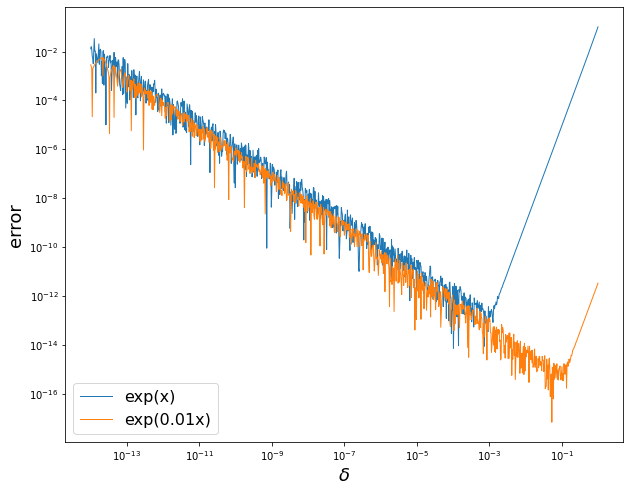

In [3]:
test_operator(x_0=1)

In [4]:
def ndiff(fun,x,full=False):
    
    ef = 1e-16
    
    
    dx = ef**(1/3)*x #from Numerical recipes
    
    try:
        if len(dx)!=0:
            dx[dx==0]=1
    except:
        None
    
    y1 = fun(x+dx)
    y2 = fun(x-dx)
    deriv = (y1-y2)/(2*dx)
    
    error = np.abs(deriv*ef**(2/3))
    
    if full:
        print(r"Estimate f'(x) = {} with optimal dx = {} and estimate error {}". format(deriv,dx,error))
        return deriv,dx,error
    
    else:
        return deriv
    

In [5]:
#testing ndiff with analytically known derivative
fun = np.cos
results = ndiff(fun,2,True)
deriv_guess = results[0]
deriv_true = -np.sin(2)
error_true = np.abs(deriv_guess-deriv_true)

print('The true derivative is {}, the true error was {}'.format(deriv_true,error_true))

Estimate f'(x) = -0.9092974268026114 with optimal dx = 9.283177667225564e-06 and estimate error 1.9590219198602764e-11
The true derivative is -0.9092974268256817, the true error was 2.307032342940829e-11


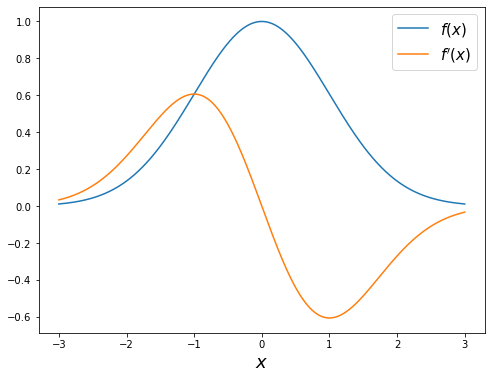

In [11]:
# testing ndiff with x as an array

def gauss(x):
    return np.exp(-0.5*x**2)


xs = np.linspace(-3,3,1001)
ys = gauss(xs)

deriv = ndiff(fun = gauss, x = xs)

fig, ax = plt.subplots(1,1,figsize = (8,6))
ax.plot(xs,ys, label = '$f(x)$')
ax.plot(xs,deriv, label = "$f'(x)$")
ax.set_xlabel(r'$x$', fontsize = 18)

ax.legend(fontsize = 15)


In [12]:
data = np.loadtxt('lakeshore.txt')

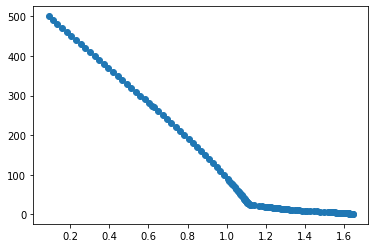

In [17]:
plt.plot(data[:,1], data[:,0], 'o')